In [1]:
%pylab inline
from ctypes import *
import os
PS=cdll.LoadLibrary('pshmf.so')


Populating the interactive namespace from numpy and matplotlib


In [2]:
def(void)        # ... set some units 
{
    UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s;

    G = GRAVITY / pow(UnitLength_in_cm, 3) * UnitMass_in_g * pow(UnitTime_in_s, 2);
    Hubble = HUBBLE * UnitTime_in_s;                                               //~0.9972, unit in km/s h/kpc
    printf("Hublle=%lf,UnitTime_in_s=%lf,G=%lf\n",Hubble,UnitTime_in_s,G);
}

SyntaxError: invalid syntax (<ipython-input-2-791fddb841e1>, line 1)

In [ ]:
def Initialliz_PS(redshift):
    DZ = PS.GF(1.0/(redshift + 1), 1.0)

In [21]:
c_int(1)

c_int(1)

In [2]:
PS.main_power(c_double(0.45))

0

In [3]:
def PS(sigma):
    return np.sqrt(2./np.pi)*dc/sigma*np.exp(-dc**2./2/sigma**2.)
def ST(sigma):
    A,a,p=0.3222,0.707,0.3
    return A*np.sqrt(2*a/np.pi)*(1+(sigma**2/a/dc**2)**p)*dc/sigma*np.exp(-a*dc**2./2/sigma**2.)

median_m = lambda x:0.5*(x[1:]+x[:-1])
x = np.loadtxt('data/z0.45-ww-1-sigma0.85-om0.268-test.dat')
dc = 1.686
lnw = 1
myc,ls = ['indianred','orange','teal','steelblue','maroon','coral','purple'],['-.','--','-']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


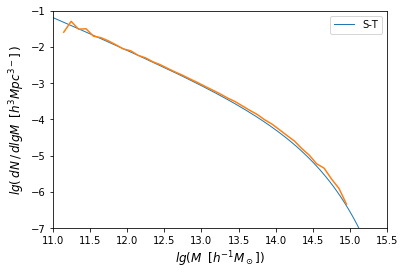

In [4]:
    ww = '-1'
    idz,ir,im,ism,irho = 0,1,2,3,4
    x[:,ism] = x[:,ism]
    fps = PS(x[:,ism])
    fst = ST(x[:,ism])
    dlnsm = np.log(x[1:,ism])-np.log(x[:-1,ism])
    dm    = x[1:,im]-x[:-1,im]
    #plt.plot(np.log10(median_m(x[:,im])*1e10),np.log10(-np.log(10)*median_m(fps)*dlnsm/dm*x[0,-1]*1e9),label='P-S',linewidth=lnw,ls=ls[0])
    plt.plot(np.log10(median_m(x[:,im])*1e10),np.log10(-np.log(10)*median_m(fst)*dlnsm/dm*x[0,-1]*1e9),label='S-T',linewidth=lnw,ls=ls[2],alpha=1)
    imass = np.int32(x.shape[0]*np.array([0.2,0.4,0.6,0.8]))
    xsimu = np.loadtxt('../data/w_1/fofmassfunc0.45.dat')
    plt.plot(xsimu[:,0],np.log10(xsimu[:,1]))
    plt.xlim(11,15.5)
    plt.ylim(-7,-1)
    plt.xlabel(r'$lg(M\;\;[h^{-1}M_\odot])$',fontsize=12)
    plt.ylabel(r'$lg(\,dN\,/ \,dlgM\;\;[h^3Mpc^{3-}]\,)$',fontsize=12)
    plt.legend()